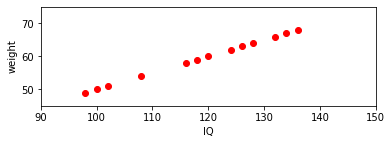

[[  1. 147.  98.]
 [  1. 150. 100.]
 [  1. 153. 102.]
 [  1. 158. 108.]
 [  1. 163. 116.]
 [  1. 165. 118.]
 [  1. 168. 120.]
 [  1. 170. 124.]
 [  1. 173. 126.]
 [  1. 175. 128.]
 [  1. 178. 132.]
 [  1. 180. 134.]
 [  1. 183. 136.]]
[-3.25599103e-10 -3.30053771e-10 -3.34508439e-10 -3.38963107e-10
 -3.43417775e-10 -3.47872443e-10 -3.52327111e-10 -3.56781779e-10
 -3.61236447e-10 -3.65691115e-10 -3.70145783e-10 -3.74600450e-10
 -3.79055118e-10 -3.83509786e-10 -3.87964454e-10 -3.92419122e-10
 -3.96873790e-10 -4.01328458e-10 -4.05783126e-10 -4.10237794e-10
 -4.14692462e-10 -4.19147130e-10 -4.23601798e-10 -4.28056466e-10
 -4.32511133e-10 -4.36965801e-10 -4.41420469e-10 -4.45875137e-10
 -4.50329805e-10 -4.54784473e-10 -4.59239141e-10 -4.63693809e-10
 -4.68148477e-10 -4.72603145e-10 -4.77057813e-10 -4.81512481e-10
 -4.85967149e-10 -4.90421817e-10 -4.94876484e-10 -4.99331152e-10
 -5.03785820e-10 -5.08240488e-10 -5.12695156e-10 -5.17149824e-10
 -5.21604492e-10 -5.26059160e-10 -5.30513828e-10 -

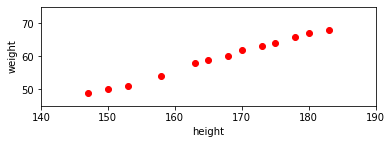

[[ 0.00000000e+00 -3.88578059e-16  5.00000000e-01]]
[0.]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
x=np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
IQ = np.array([[98, 100, 102, 108, 116, 118, 120, 124, 126, 128, 132, 134, 136]]).T
y=np.array([[49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68]]).T
plt.subplot(2,1,1)
plt.plot(IQ,y,"ro")
plt.axis([90,150,45,75])
plt.xlabel("IQ")
plt.ylabel("weight")
plt.show()
# x.shape là kích thước ma trận của x (hàng trước cột sau)
one = np.ones((x.shape[0],1)) # tạo ma trận 1 với x.shape[0] hàng và 1 cột
Xbar = np.concatenate((one,x),axis = 1) # hợp nhất ma trận, axis = 0 (default) thì hợp như đại số
Xbar = np.concatenate((Xbar,IQ),axis = 1)
print(Xbar)
# axis = 1 thì hợp theo hàng này cột này
# eg: 1 2 3 4 hợp với (5 6 7 8)^T => 1 5, 2 6, 3 7, 4 8
A = np.dot(Xbar.T,Xbar) # nhân ma trận
B = np.dot(Xbar.T,y)
w  = np.dot(np.linalg.pinv(A),B) #nghịch đảo
#công thức w = inv(Xbar.T*Xbar)*(Xbar.T*y)
x0 = np.linspace(145,185) #tạo chuỗi các điểm (start - stop - num)
y0 = w[1][0]*x0+w[0][0] # công thức
print(y0)
plt.subplot(2,1,2)
plt.plot(x,y,"ro") #vẽ
plt.plot(x0,y0) #vẽ, k có "ro" thì mặc định là đường thẳng
plt.axis([140,190, 45,75]) # tạo đồ thị
plt.xlabel("height")
plt.ylabel("weight")
plt.show()
# T = int(input("Số test: "))
# for i in range(T):
#   cc = int(input("Mời nhập chiều cao: "))
#   cn = int(input("Mời nhập cân nặng đúng: "))
#   print("Cân nặng dự đoán là:", w[1][0]*cc + w[0][0])
#   print("Độ lệch:", abs(w[1][0]*cc + w[0][0]-cn))
#dùng scikit-learn
reg = linear_model.LinearRegression() #mặc định fit_intercept = true
reg.fit(Xbar,y)
print(reg.coef_) # w1 or những-thứ-cần-tính-ngoài-bias
print(reg.intercept_) #chính là bias

# or simple, just put it in like this
# reg = linear_model.LinearRegression() #mặc định fit_intercept = true
# xs = np.concatenate((x,IQ),axis=1)
# print(xs,y)
# reg.fit(xs,y)
# print(reg.coef_)
# print(reg.intercept_)



In [ ]:
#linear-regression for many variables (multiple-linear-regression)
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import pandas as pd

dataset = pd.read_csv("https://raw.githubusercontent.com/pewdspie24/MachineLearning/master/Fish.csv")
species = input("Input your species here:")
dataset.where(dataset["Species"]==species, inplace = True)
dataset = dataset.dropna(thresh=1)
#print(dataset)
df = pd.DataFrame(dataset)
features = ['Length1','Length2','Length3','Height','Width']
Y = df["Weight"]
#print(Y)
X = df[features]
regr = linear_model.LinearRegression()
print(X)
regr.fit(X,Y)
print("Intercept: ",regr.intercept_)
print("Coefficients: ",regr.coef_)

y_input = float(input("Input expectation weights: "))
y_res = 0
for i in range (0,len(features)):
  x=float(input("Input Length"+str(i+1)+" : "))
  y_res += x*regr.coef_[i]
print("Weights: ", y_res+regr.intercept_)
print("Loss function: ", abs(y_input-y_res-regr.intercept_))



Input your species here:Bream
    Length1  Length2  Length3   Height   Width
0      23.2     25.4     30.0  11.5200  4.0200
1      24.0     26.3     31.2  12.4800  4.3056
2      23.9     26.5     31.1  12.3778  4.6961
3      26.3     29.0     33.5  12.7300  4.4555
4      26.5     29.0     34.0  12.4440  5.1340
5      26.8     29.7     34.7  13.6024  4.9274
6      26.8     29.7     34.5  14.1795  5.2785
7      27.6     30.0     35.0  12.6700  4.6900
8      27.6     30.0     35.1  14.0049  4.8438
9      28.5     30.7     36.2  14.2266  4.9594
10     28.4     31.0     36.2  14.2628  5.1042
11     28.7     31.0     36.2  14.3714  4.8146
12     29.1     31.5     36.4  13.7592  4.3680
13     29.5     32.0     37.3  13.9129  5.0728
14     29.4     32.0     37.2  14.9544  5.1708
15     29.4     32.0     37.2  15.4380  5.5800
16     30.4     33.0     38.3  14.8604  5.2854
17     30.4     33.0     38.5  14.9380  5.1975
18     30.9     33.5     38.6  15.6330  5.1338
19     31.0     33.5     38.7 

In [ ]:
#checking whether linearable
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import pandas as pd
dataset = pd.read_csv("https://raw.githubusercontent.com/pewdspie24/MachineLearning/master/salary_data.csv")
df = pd.DataFrame(dataset)
X = df[["Salary"]]
Y = df[["YearsExperience"]]
regr = linear_model.LinearRegression()
regr.fit(X,Y)
# print(regr.coef_)
# print(regr.intercept_)
a = int(input())
print(regr.intercept_+regr.coef_[0]*a)

90000
[6.73074877]
